# Maschinelles Lernen
# Aufgabenblatt 05 - Aufgabe 02
# Prof. Dr. David Spieler, Prof. Dr. Stephanie Thiemichen

In [9]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
iris_dataset = load_iris()

In [11]:
X = iris_dataset.data
y = iris_dataset.target

# Aufgabe 2.2
Die Features des Iris Datensatzes sind
- Kelchblattlänge
- Kelchblattbreite
- Blütenblattlänge
- Blütenblattbreite
jeweils in cm. 

Es wird klassifiziert nach drei verschiedenen Spezies:
- Setosa
- Versicolor
- Virginica

In [12]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Visualisierung der Daten
**Achtung:** Da uns in einem Scatterplot lediglich zwei Dimensionen zur Verfügung stehen, können wir nicht alle 4 Features des Datensatzes auf diese Art und Weise darstellen. Trotzdem ist ein solcher Plot zum besseren Verständnis hilfreich.

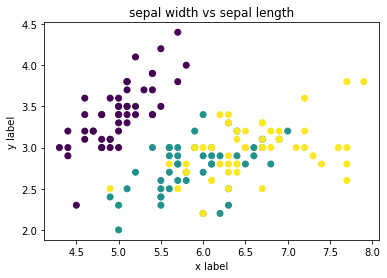

In [14]:
import pandas as pd

data = pd.DataFrame(iris_dataset.data)
data.columns = iris_dataset.feature_names
data['label'] = iris_dataset.target
data.head()

# create a scatter plot of SEPAL WIDTH versus SEPAL LENGTH and color by SPECIES
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data["label"])
plt.title("sepal width vs sepal length")
plt.xlabel('x label')
plt.ylabel('y label')

plt.show()

In [15]:
import plotly.express as px

data = pd.DataFrame(iris_dataset.data)
data.columns = iris_dataset.feature_names
data['label'] = iris_dataset.target
# data['label'] = data.label.astype(str)

dow = {
    0:'setosa', 
    1:'versicolor', 
    2:'virginica'
}
data["species"] = data['label'].map(dow)

fig = px.scatter_matrix(data,
    dimensions=iris_dataset.feature_names,
    color="species")
fig.show()

In [16]:
scores = []
range_k = range(1, 100+1)
for k in range_k:
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, X, y, cv = 5, scoring='accuracy')
    scores.append(score.mean())

*Anmerkungen zur Kreuzvalidiereung:*

- 5-fache Kreuzvalidierung bedeutet, dass der Datensatz in 5 Teile aufgeteilt wird und dann wiederholt (5-mal) auf 4 Teilen der Daten gefittet / trainiert wird und auf dem 5. Teil gescored.
- Der Default ist eine stratifizierte Kreuzvalidierung, d.h. die Verteilung der Klassen der Zielgröße bleibt in den einzelnen Splits erhalten.
- Im Default werden die Daten nicht **geschuffelt**, was u.U. zu Problemen führen kann, falls der Datensatz "ungünstig" geordnet ist z.B. bzgl. einzelner Features (z.B. Geschlecht: m/w/d) und so beispielsweise bestimmte Featureausprägungen in manchen Datenteilen gar nicht vorkommen (z.B. kein m). Durch Schuffeln kann das zwar immer noch passieren, es wird aber unwahrscheinlicher. Man solltes dann zwecks Reproduzierbarkeit aber einen Seed setzen (mittels random_state), da sonst bei jedem Durchlauf variierende Ergebnisse herauskommen.

Zum Schuffeln müssten folgende Zeilen ergänzt / geändert werden:

In [17]:
# from sklearn.model_selection import StratifiedKFold

# # For der Schleife (Datensplitten muss nicht jedes Mal neu erfolgen):
# strat_k_fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 23)

# # In der Schleife über k:
# score = cross_val_score(knn, X, y, cv = strat_k_fold, scoring = 'accuracy')

Text(0, 0.5, 'accuracy (cv)')

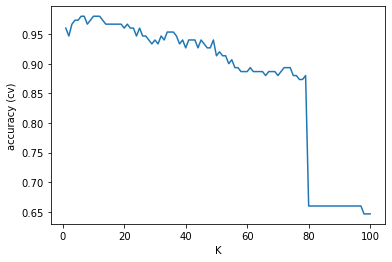

In [18]:
plt.plot(range_k, scores)
plt.xlabel('K')
plt.ylabel('accuracy (cv)')

# Aufgabe 2.5

In [19]:
max_score = max(scores)
for i in range(len(scores)):
    if scores[i] == max_score:
        print(i+1)

6
7
10
11
12


# Aufgabe 2.6
Durch Kreuzvalidierung wird die Genauigkeit auf einem Testdatensatz (genauer 5 verschiedenen aus dem ursprünglichen Datensatz generierten) ermittelt. D.h. unsere Aussagen bzgl. der Genauigkeit lassen durchaus auf Über-/Unteranpassung schließen.

Zunächst steigt die Genauigkeit von K=1 bis ca. K=15 bzw. bleibt auf hohen Niveau >0.95. Danach sinkt die Genauigkeit langsam ab bis zu einem rapiden Fall um K=80.

Während die ersten Werte K=1 bis K=4 noch suboptimal sind und evtl. im Bereich der Überanpassung liegen, so lassen die Werte für K>5, im Extremfall bei K um die 80 (nahezu die Hälfte der Datenpunkte) auf eine Unteranpassung schließen. Hier wird die Nachbarschaft zu weit gefasst (und damit das Modell zu weich / ungenau).

In [12]:
np.argmax(scores, )

5

In [13]:
for i in range(1,100):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
